# STOCK PRICING PREDICTION

### Intuition

### Converting it into a ML problem:
- Upon checking the data and the features we can convert it into a simple Machine learning problem that deals with the time-series data in which we have to predict the final closing stock

- the closing stock is given along with the highest and lowest stocks on that day using these features we will predict the closing stock for every day 

## Workflow:
- Data Extraction
- EDA
- Data Splitting 
- Data Preprocessing
- Building ML Models
- Testing the Models

### Performance metric:
- MSE: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
  Mean squared error regression loss
  

## Data Extraction

In [1]:
!pip install mysql-connector-python

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
import mysql.connector

conn = mysql.connector.connect(
         user='foouser',
         password='F88Pa%%**',
         host='134.209.144.239',
         database='stocksdb')
print(conn)

In [2]:
!pip install pandas_datareader
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler


You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
C:\Users\santosh\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
data_source = 'kaggle' # alphavantage or kaggle

if data_source == 'alphavantage':
    # ====================== Loading Data from Alpha Vantage ==================================

    api_key = 'DR0BE7U6W1GUGTBP'

    # American Airlines stock market prices
    ticker = "AAL"

    # JSON file with all the stock market data for AAL from the last 20 years
    url_string = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=%s&outputsize=full&apikey=%s"%(ticker,api_key)
    # Save data to this file
    file_to_save = 'stock_market_data-%s.csv'%ticker

    # If you haven't already saved data,
    # Go ahead and grab the data from the url
    # And store date, low, high, volume, close, open values to a Pandas DataFrame
    if not os.path.exists(file_to_save):
        with urllib.request.urlopen(url_string) as url:
            data = json.loads(url.read().decode())
            # extract stock market data
            data = data['Time Series (Daily)']
            df = pd.DataFrame(columns=['Date','Low','High','Close','Open'])
            for k,v in data.items():
                date = dt.datetime.strptime(k, '%Y-%m-%d')
                data_row = [date.date(),float(v['3. low']),float(v['2. high']),
                            float(v['4. close']),float(v['1. open'])]
                df.loc[-1,:] = data_row
                df.index = df.index + 1
        print('Data saved to : %s'%file_to_save)        
        df.to_csv(file_to_save)

    # If the data is already there, just load it from the CSV
    else:
        print('File already exists. Loading data from CSV')
        df = pd.read_csv(file_to_save)

else:

    # ====================== Loading Data from Kaggle ==================================
    # You will be using HP's data. Feel free to experiment with other data.
    # But while doing so, be careful to have a large enough dataset and also pay attention to the data normalization
    df = pd.read_csv(os.path.join('Stocks','C:/Users/santosh/Desktop/stock-pricing/stock data/Data/Stocks/hpq.us.txt'),delimiter=',',usecols=['Date','Open','High','Low','Close'])
    print('Loaded data from the Kaggle repository')

Loaded data from the Kaggle repository


## Exploratory Data Analysis

In [7]:
df.describe()

,Open,High,Low,Close
count,12075.000000,12075.000000,12075.000000,12075.000000
mean,6.735977,6.834001,6.644309,6.740256
std,6.349568,6.444463,6.261201,6.354457
min,0.118670,0.118670,0.114820,0.114820
25%,1.056300,1.071800,1.044900,1.056300
50%,3.755000,3.793100,3.712800,3.751100
75%,11.654500,11.856500,11.482000,11.664000
max,29.328000,29.857000,28.062000,29.857000


In [8]:
print("Total number of points:",df.shape[0])

Total number of points: 12075


In [4]:
df.head()

,Date,Open,High,Low,Close
0,1970-01-02,0.30627,0.30627,0.30627,0.30627
1,1970-01-05,0.30627,0.31768,0.30627,0.31385
2,1970-01-06,0.31385,0.31385,0.30996,0.30996
3,1970-01-07,0.31385,0.31385,0.31385,0.31385
4,1970-01-08,0.31385,0.31768,0.31385,0.31385


In [5]:
df = df.sort_values('Date')

In [28]:
print("The Start Date is:",df['Date'][0])
print("The End Date is:",df['Date'][-1:])

The Start Date is: 1970-01-02
The End Date is: 12074    2017-11-10
Name: Date, dtype: object


#### lets see how the distribution is of various features in the data

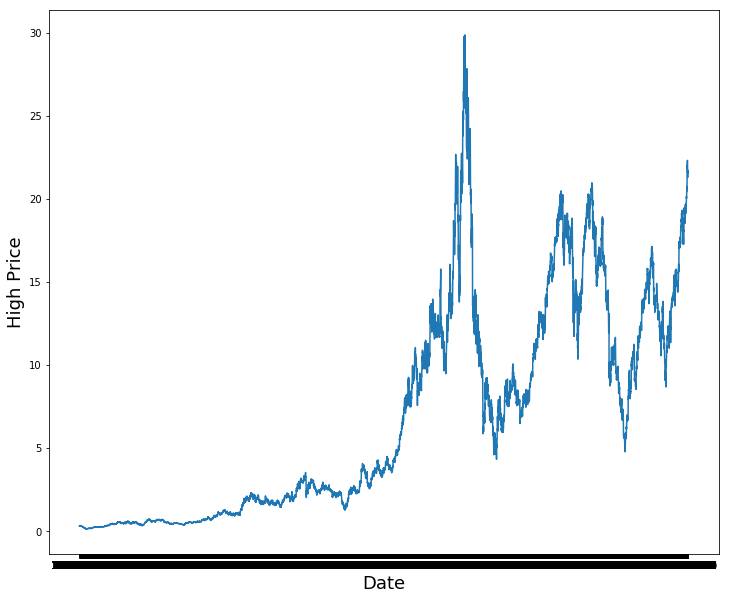

In [15]:
plt.figure(figsize = (12,10))
plt.plot(df['Date'],df['High'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('High Price',fontsize=18)
plt.show()

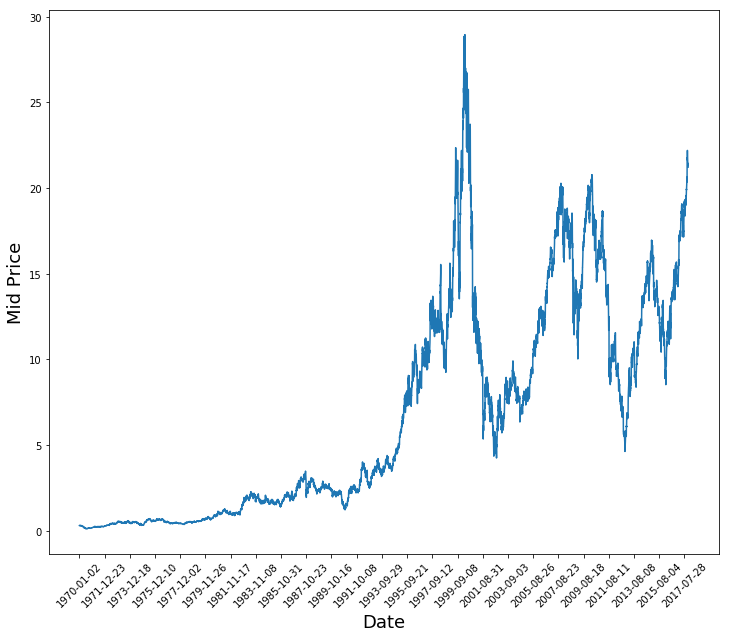

In [9]:
plt.figure(figsize = (12,10))
plt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

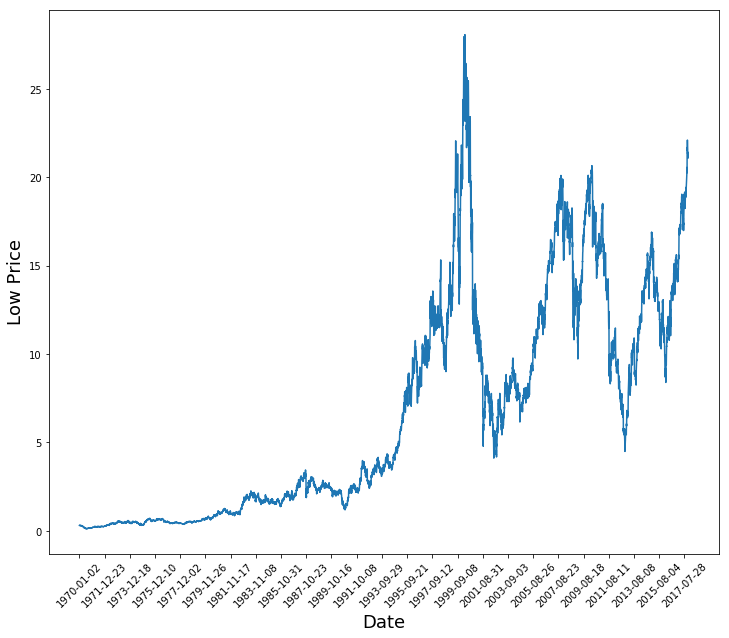

In [11]:
plt.figure(figsize = (12,10))
plt.plot(range(df.shape[0]),df['Low'])
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Low Price',fontsize=18)
plt.show()

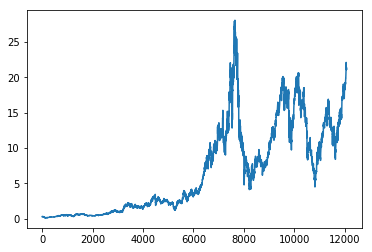

In [16]:
plt.plot(df['Low'])
plt.show()

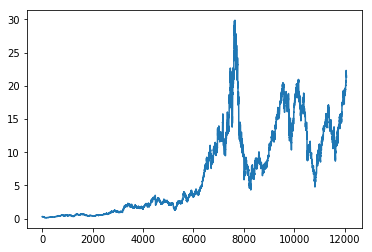

In [18]:
plt.plot(df['High'])
plt.show()

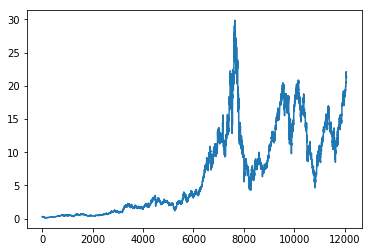

In [20]:
plt.plot(df['Close'])
plt.show()

In [30]:
import plotly 
plotly.tools.set_credentials_file(username='santoshdasa001', api_key='0cc4HfVeLWU2jZFi5lW4')

In [31]:
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd
from datetime import datetime

trace_high = go.Scatter(
                x=df.Date,
                y=df['High'],
                name = "High",
                line = dict(color = '#17BECF'),
                opacity = 0.8)

trace_low = go.Scatter(
                x=df.Date,
                y=df['Low'],
                name = "Low",
                line = dict(color = '#7F7F7F'),
                opacity = 0.8)

data = [trace_high,trace_low]

layout = dict(
    title = "Manually Set Date Range",
    xaxis = dict(
        range = ['1970-01-02','2017-11-10'])
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename = "Manually Set Range")

### Observations:
from above exploration we can draw some insights:
- The data was collected between 1970 to 2017
- There is not much a difference between the high and low stocks per year except the year 2000
- since there is a lot of overlap we can expect that the closing stock would be in the same range

## Data Splitting

In [32]:
y=df['Close']
x=df.drop(['Close','Date'],axis=1)

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,test_size=0.3)

In [55]:
print("No. of points in Train:",x_train.shape[0])
print("No. of points in Test:",y_test.shape[0])

No. of points in Train: 8452
No. of points in Test: 3623


### Model-1: Linear Regression:


In [57]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [58]:
# Create linear regression object
regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(regr.predict(x_test),y_test))
print('Variance score: %.2f' % regr.score(x_test,y_test))

Coefficients: 
 [-0.47807214  0.74100707  0.7370536 ]
Mean squared error: 0.01
Variance score: 1.00


### Now lets plot the linear model

In [69]:
#this is the standard plotly code
def data_to_plotly(x):
    k = []
    
    for i in range(0, len(x)):
        k.append(x[i])
        
    return k

In [71]:
p1 = go.Scatter(y=y_test, 
                mode='markers',
                marker=dict(color='black')
               )

p2 = go.Scatter(y=regr.predict(x_test),
                mode='lines',
                line=dict(color='blue', width=3)
                )

layout = go.Layout(xaxis=dict(ticks='', showticklabels=False,
                              zeroline=False),
                   yaxis=dict(ticks='', showticklabels=False,
                              zeroline=False),
                   showlegend=False, hovermode='closest')

fig = go.Figure(data=[p1, p2], layout=layout)

py.iplot(fig)
